In [1]:
from functions import objectives
from functions import constraints
import tensorflow as tf
import matplotlib.pyplot as plt

plt.style.use('plot_style.txt')

2023-04-18 12:06:46.047761: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
x_list = tf.linspace(0, 1, 1000)
y_list = tf.linspace(0, 1, 1000)
xs, ys = tf.meshgrid(x_list, y_list)
coordinates = tf.stack((tf.reshape(xs, [-1]), tf.reshape(ys, [-1])), axis=1)

2023-04-18 12:06:55.201901: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
objectives.goldstein_price(tf.Variable([[0.94769, 0.46856]], dtype=tf.float64))

<tf.Tensor: shape=(1, 1), dtype=float64, numpy=array([[-0.5273951]])>

In [4]:
constraints.centered_branin(tf.Variable([[0.94769, 0.46856]], dtype=tf.float64))

<tf.Tensor: shape=(1, 1), dtype=float64, numpy=array([[-6.37877422e-05]])>

In [5]:
constraints.parr_constraint(tf.Variable([[0.94769, 0.46856]], dtype=tf.float64))

<tf.Tensor: shape=(1, 1), dtype=float64, numpy=array([[-5.61680662e-05]])>

In [6]:
constraints.centered_branin(tf.Variable([[0.35262327, 0.45821539]], dtype=tf.float64))

<tf.Tensor: shape=(1, 1), dtype=float64, numpy=array([[0.04046348]])>

In [7]:
linear_objective = objectives.linear_objective(coordinates)
goldstein_price_objective = objectives.goldstein_price(coordinates)
constraint_one = constraints.toy_constraint_one(coordinates)
constraint_two = constraints.toy_constraint_two(coordinates)
centered_branin_constraint = constraints.centered_branin(coordinates)
parr_constraint = constraints.parr_constraint(coordinates)

## Objectives

#### Linear Objective

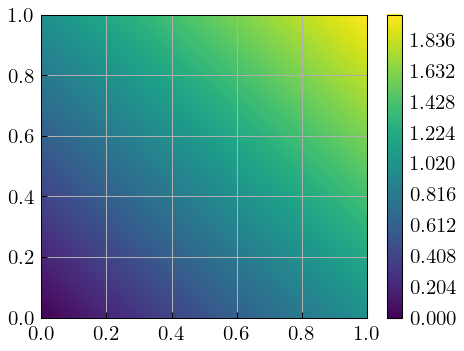

In [8]:
fig, ax = plt.subplots()
objective_plot = ax.contour(xs, ys, tf.reshape(linear_objective, [y_list.shape[0], x_list.shape[0]]), levels=500, zorder=1)
fig.colorbar(objective_plot)
ax.grid()
plt.show()

#### Goldstein-Price

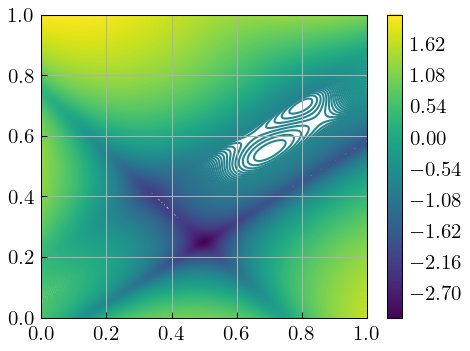

In [9]:
fig, ax = plt.subplots()
objective_plot = ax.contour(xs, ys, tf.reshape(goldstein_price_objective, [y_list.shape[0], x_list.shape[0]]), levels=500, zorder=1)
fig.colorbar(objective_plot)
plt.show()

## Constraints

#### Toy Constraint One

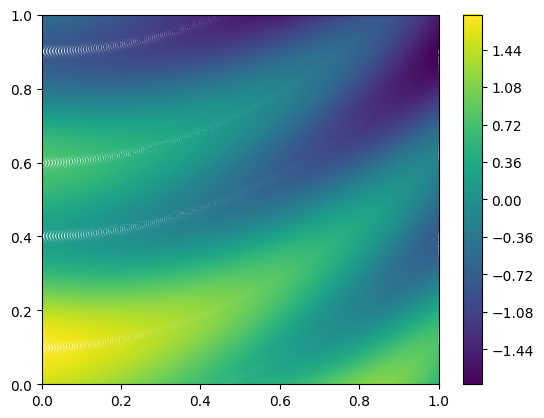

In [10]:
fig, ax = plt.subplots()
constraint_one_plot = ax.contour(xs, ys, tf.reshape(constraint_one, [y_list.shape[0], x_list.shape[0]]), levels=500, zorder=1)
fig.colorbar(constraint_one_plot)
plt.show()

#### Toy Constraint Two

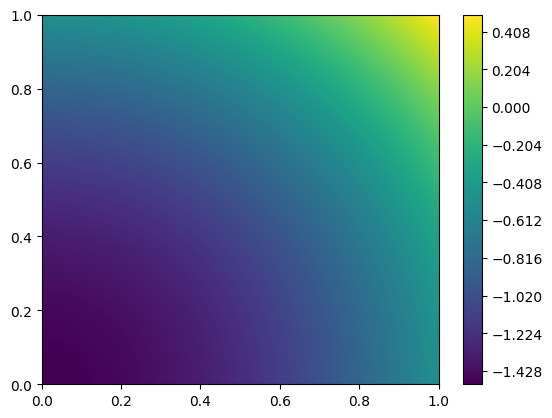

In [11]:
fig, ax = plt.subplots()
constraint_two_plot = ax.contourf(xs, ys, tf.reshape(constraint_two, [y_list.shape[0], x_list.shape[0]]), levels=500, zorder=1)
fig.colorbar(constraint_two_plot)
plt.show()

#### Centered Branin

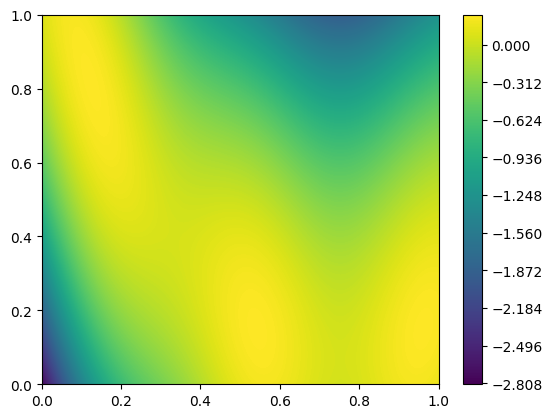

In [12]:
fig, ax = plt.subplots()
centered_branin_constraint = constraints.centered_branin(coordinates)
centered_branin_plot = ax.contourf(xs, ys, tf.reshape(centered_branin_constraint, [y_list.shape[0], x_list.shape[0]]), levels=500)
fig.colorbar(centered_branin_plot)
plt.show()

#### Parr

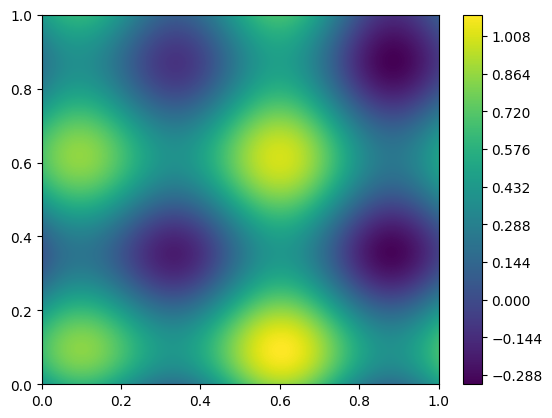

In [13]:
fig, ax = plt.subplots()
parr_plot = ax.contourf(xs, ys, tf.reshape(parr_constraint, [y_list.shape[0], x_list.shape[0]]), levels=500, zorder=1)
fig.colorbar(parr_plot)
plt.show()